In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pbdlib as pbd

%matplotlib inline
%load_ext autoreload
%autoreload 2

from pbdlib.utils.jupyter_utils import *
np.set_printoptions(precision=2)

In [3]:
dp = os.path.dirname(pbd.__file__) + '/data/demos/placing'
filelist = next(os.walk(dp))[2]
short = filelist[20:23]
data = []
for f in filelist:
    temp = np.genfromtxt(dp + '/' + f, delimiter=',')
    data.append(temp[1:,[9, 10, 11, 17, 18, 19]])

In [4]:
length = []
for d in data:
    length.append(d.shape[0])
lenindex = sorted(range(len(length)), key=lambda k: length[k])
data_sorted = [data[i] for i in lenindex]

In [11]:
def angle_corrector(a):
    if a[-1] < -2:
        a[-1] = a[-1] + 2*np.pi
    return a
data_s_2 = []
for p in data_sorted:
    demo = np.apply_along_axis(angle_corrector, 1, p)
    data_s_2.append(demo)

In [6]:
data_s_3 = []
for d in data_s_2:
    count = (data_s_2[-1].shape[0])/(d.shape[0])
    if count == 1:
        interpol = d
    else:
        size = (count*(d.shape[0]-1), d.shape[1])
        interpol = np.zeros(size)
        for i in range(d.shape[0]-1):
            start = d[i]
            end = d[i+1]
            diff = start - end
            diffstep = diff/count
            for j in range(count):
                interpol[count*i+j] = start - diffstep*j
    data_s_3.append(interpol)

In [7]:
data_1 = pbd.utils.align_trajectories(data_s_3, nb_states=5) 

KeyboardInterrupt: 

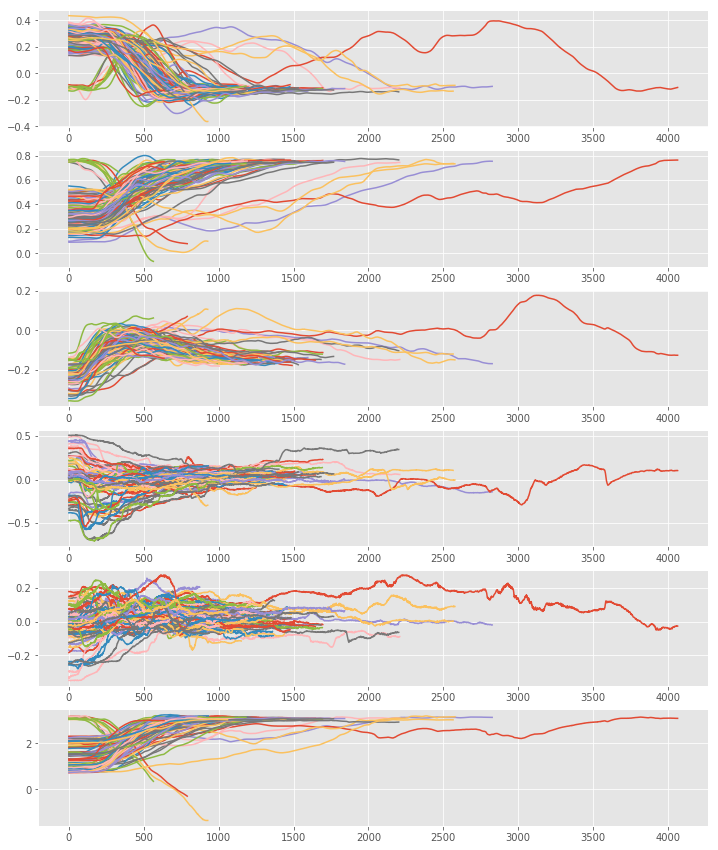

In [10]:
# plotting
fig, ax = plt.subplots(nrows=6)
fig.set_size_inches(12,15)
for i in range(6):
    for p in data:
        ax[i].plot(p[:, i])

In [230]:
# write files
storepath = os.path.dirname(pbd.__file__) + '/data/demos/corrected/'

for i in range(len(filelist)):
    np.savetxt(storepath+filelist[i], data_1[i], delimiter=',')